In this notebook, we will examine particle kinematics in steep and breaking waves. We will study several properties of these waves as they focus and break, including particle velocities and accelerations, as well as the phase velocity. We're also interested in the spatial distribution of these quantities. That is, how does the ratio of the horizontal velocity, divided by the phase velocity, at the crest compare with that at the steepest part of the wave? 

We should start with some definitions. 

We let $(x,y)$ define the horizontal and vertical axis, with their associated velocities being $(u,v)$. The velocity field may be defined in the $\textbf{Eulerian}$ framework, in which it is evaluated at a point in space, or the $\textbf{Lagrangian}$ framework, in which it is defined for a fluid particle, which was at location $(x_0,y_0)$ at $t=0$. 

The phase velocity is defined as the speed at which a fixed phase of the wave is traveling. This could, for example, be the crest of the wave. However, as the wave steepens, different phases of the wave travel at different speeds, and the notion of the phase may even break down at wave breaking. Then, we seek a more geometric defintion. Longuet-Higgins sorted this out in 1957. If we track the crest of the wave, with wave height $\eta$, then the speed at which the tallest part of the wave, i.e. the crest, moves is given by
$$ \frac{d\eta_x}{dt} =0 = \eta_{xt}+c_m\eta_{xx},$$
from which the phase velocity of the maximum height $c_m$ may be extracted. Similarly, if we were instead interested in the speed at which the steepest part of the wave travelled, we would find $c_s$ through the relationship 
$$ \frac{d\eta_{xx}}{dt} =0=\eta_{xxt}+c_s\eta_{xxx}.$$

In general, we expect $c_{m} \neq c_{s}$.

To this end, we will examine these kinematics by integrating the fully nonlinear potential flow equations. The dependent variables of the system are the particle positions $(x,y)$, and the velocity potential $\phi$. 

The numerical scheme is due to Dold (1991). The boundary conditions are assumed to be periodic, and we work in infinitely deep water. 

We would like to begin by validating some of our processing. This is most easily done by considering a periodic wave. 

In [7]:
imatlab_export_fig('print-png') 

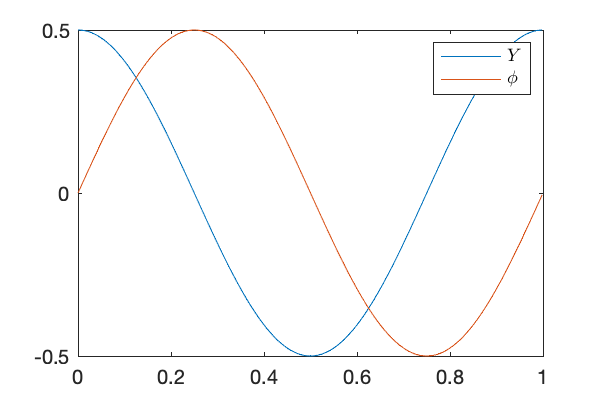

In [26]:
%% Begin Matlab code 
cd /Users/npizzo/Documents/Research/ParticleKinematics/DLS_proj/
%
N = 512; % number of spectral modes
ML = 2*pi;
wl = 2*pi;
g = 1; 
xi = 0:1/N:1-1/N; 
x=xi;
% a=0.275;
a=0.5;
y=a*cos(2*pi*xi);
f=a*sin(2*pi*xi);
xi2= 0:max(xi)/(N-1):max(xi);
% xx=[x(1):X/(npts-1):x(end)];
xx=interp1(xi,x,xi2)';
clf
yy=interp1(x,y,xx);
ff=interp1(x,f,xx);
clf
p1=plot(xx,yy);
hold on
p2=plot(xx,ff);
x3=xx*2*pi;
l1=legend([p1 p2],'$Y$','$\phi$');
set(l1,'interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

Now execute the code

In [9]:
%%
tl=15;
delete xc.txt
delete yc.txt 
delete fc.txt 
delete bw.txt
delete wl.txt
delete S.txt
% delete k.txt
BW=1;
% save xc.txt x_f -ascii
% save yc.txt y_f -ascii
% save fc.txt f_f -ascii
save xc.txt x3 -ascii
save yc.txt yy -ascii
save fc.txt ff -ascii
save S.txt a -ascii
save bw.txt BW -ascii
save tl.txt tl -ascii
save wl.txt wl -ascii 
% save k.txt k -ascii
unix('./run2.sh'); 

dold.f:556:72:

  556 |     1     write(7) (real(pno(j,i)),j=1,n)
      |                                                                        1
dold.f:587:72:

  587 |     3       vxx(i) = fbd(i,1)
      |                                                                        1
dold.f:621:72:

  621 |     5     if (dts.lt.tp) dts = tp
      |                                                                        1
dold.f:741:72:

  741 |     7       f(i) = fx*f(i)
      |                                                                        1
dold.f:744:72:

  744 |             do 8 i=1,n
      |                                                                        1
dold.f:747:72:

  747 |     8         fbd(i,j) = 0.d0
      |                                                                        1
dold.f:790:72:

  790 |     9   strn0(i) = rx*strn0(i)
      |                                                                        1
dold.f:795:72:

  795 |    17   strn0(i) = sqrt(

dold.f:1194:72:

 1194 |    50   rpi(i) = u(i)*y1(i)-v(i)*x1(i)
      |                                                                        1
dold.f:1199:72:

 1199 |    21   fd(i) = .5*sv(i)-(p0(i)+gty*y(i)-uv*sf(i))
      |                                                                        1
dold.f:1208:72:

 1208 |    12   ft(i) = p(i)
      |                                                                        1
dold.f:1217:72:

 1217 |    51   rpi(i) = ut(i)*y1(i)-vt(i)*x1(i)
      |                                                                        1
dold.f:1233:72:

 1233 |    32   fd2(i) = sv(i)-gty*v(i)+uv*sft(i)-y(i)*v(i)*uv2
      |                                                                        1
dold.f:1241:72:

 1241 |      *          -v(i)*(vt(i)+vd(i))-sv(i)-uv*u(i)*v(i)
      |                                                                        1
dold.f:1255:72:

 1255 |    52   rpi(i) = ut2(i)*y1(i)-vt2(i)*x1(i)
      |                          

dold.f:1612:72:

 1612 |      *   +dt5*(fbd(i,2)+dt6*(fbd(i,3)+dt7*(fbd(i,4)+dt8*fbd(i,5))))))))
      |                                                                        1
dold.f:1632:72:

 1632 |    21     f(j) = f(i)
      |                                                                        1
dold.f:1644:72:

 1644 |    25     ymn = ymn+y(i)*x1(i)
      |                                                                        1
dold.f:1652:72:

 1652 |    26       y(i) = y(i)+ymn
      |                                                                        1
dold.f:1673:72:

 1673 |    27     enp = enp+x1(i)*(y(i)-ym)*(y(i)-ym)
      |                                                                        1
dold.f:1686:72:

 1686 |    28     y(i) = ym+tp*(y(i)-ym)
      |                                                                        1
dold.f:1802:72:

 1802 |    31   if (abs(tp).gt.180.d0) slp(i) = slp(i)+sign(360.d0,tp)
      |                                     

dold.f:2417:72:

 2417 |      *     +xx*(42.d0*a7+xx*(56.d0*a8+xx*(72.d0*a9+xx*90.d0*a10)))))))
      |                                                                        1
dold.f:2432:72:

 2432 |      *      +xx*(42.d0*a7+xx*(56.d0*a8+xx*(72.d0*a9+xx*90.d0*a10)))))))
      |                                                                        1
dold.f:2450:72:

 2450 |     1     w(n+i) = w(i)+pw
      |                                                                        1
dold.f:2454:72:

 2454 |      *          +1050.d0*(w(i+1)-w(i-1)))/1260.d0
      |                                                                        1
dold.f:2460:72:

 2460 |    11     w(n+i) = w(i)+pw
      |                                                                        1
dold.f:2464:72:

 2464 |      *          +5250.d0*(w(i+1)+w(i-1))-9220.75d0*w(i))/3150.d0
      |                                                                        1
dold.f:2471:72:

 2471 |    21     w(n+i) = w(i)+pw


dold.f:2599:72:

 2599 |      *      +(10.d0*(w(i+4)+w(i-4))+(w(i+5)+w(i-5)))))))/1024.d0
      |                                                                        1
dold.f:2604:72:

 2604 |   101 z(i) = w(i)
      |                                                                        1
dold.f:2609:72:

 2609 |   111 z(i) = abs(w(i))
      |                                                                        1
dold.f:2620:72:

 2620 |   121 if(w(i).ge.w(i-1).and.w(i)+w(i-1).lt.0.d0) nz = i
      |                                                                        1
dold.f:2626:72:

 2626 |   131   w(i-nz1) = z(i)
      |                                                                        1
dold.f:2629:72:

 2629 |   132   w(i+nnz) = z(i)+wvl
      |                                                                        1
dold.f:2636:72:

 2636 |   141 w(n+i) = w(i)+pw
      |                                                                        1
dold.f:2642:72:

 264

   1.4069758852663727     
   1.4111574023117708     
   1.4154713899475642     
   1.4196747247707617     
   1.4234930121136000     
   1.4274705605327924     
   1.4315134522565647     
   1.4355228576235357     
   1.4394654680837129     
   1.4433705338364373     
   1.4472552754498085     
   1.4511180410475322     
   1.4549579179506151     
   1.4587913477755030     
   1.4625264203816493     
   1.4664411102758723     
   1.4696597550434010     
   1.4731754747549621     
   1.4769308856602381     
   1.4800361689691970     
   1.4829678448157564     
   1.4856165844931231     
   1.4878746586802747     
   1.4894011592010654     
   1.4904612563316544     
   1.4911305440331695     
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
STOP data is no longer intelligible


Next load the data

In [10]:
%%
formatSpec='%f'; 
fileID = fopen(['x.txt'], 'r');
xout = fscanf(fileID,formatSpec);
fclose(fileID); 
fileID = fopen(['y.txt'], 'r');
yout = fscanf( fileID, formatSpec);
fclose( fileID );
fileID = fopen(['phi.txt'], 'r');
pout = fscanf(fileID,formatSpec);
fclose(fileID);
fileID=fopen(['t.txt'], 'r');
to = fscanf(fileID,formatSpec);
fclose(fileID);
t=to(1:N:end);
nout_0=length(t);
nout=round(nout_0)-1;
data_o =zeros(N,nout_0);
x_o=zeros(N,nout_0);
y_o=zeros(N,nout_0);
p_o=zeros(N,nout_0);
for i=1:N
for j=1:nout_0
x_o(i,j)=xout(i+N*(j-1),1);
y_o(i,j)=yout(i+N*(j-1),1);
p_o(i,j)=pout(i+N*(j-1),1);
end
end
xi=0:2*pi/N:2*pi*(1-1/N);
dxi=abs(xi(2)-xi(1));
% reinterpolate
M=1*N;
xi2=0:2*pi/M:2*pi*(1-1/M);
x_1=zeros(M,length(t));
y_1=x_1;
for i=1:length(t)
    x_1(:,i)=interp1(xi,x_o(:,i),xi2);
    y_1(:,i)=interp1(xi,y_o(:,i),xi2);
end
t2=0:max(t)/1000:max(t);
x_2=zeros(M,length(t2));
y_2=x_2;
for i=1:M
    x_2(i,:)=interp1(t,x_1(i,:),t2);
    y_2(i,:)=interp1(t,y_1(i,:),t2);
end

Load a movie to view this

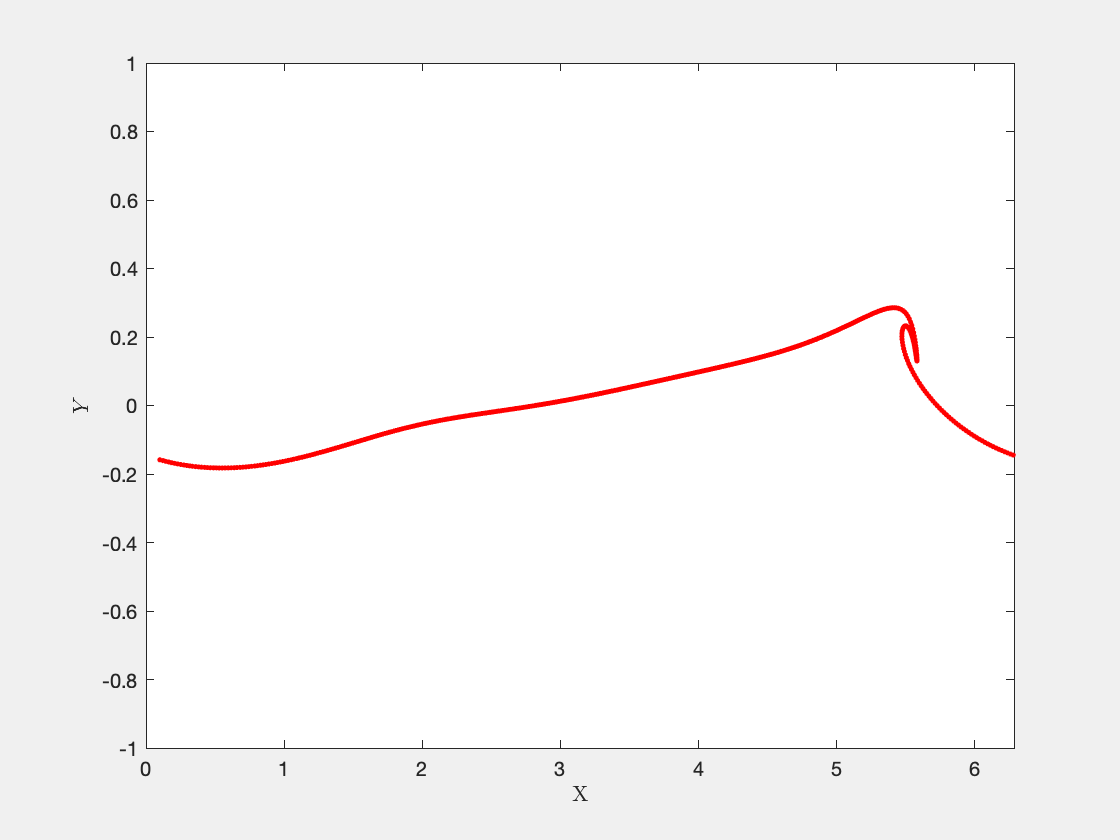

In [12]:
%%
clf
set(gca,'fontsize',28)
for i=1:1:length(t)
plot(x_o(:,i),y_o(:,i),'.r')
xlim([0 2*pi])
ylim([-1 1]) 
pause(0.1)
hold off
end
% set(gca,'fontsize',28)
xlabel('X','interpreter','latex')
ylabel('$Y$','interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');

It looks like it'll be tough to watch this as a movie, so we'll have to think about how we display the data

In [14]:
%% compute velocity 
u=zeros(N,length(t));
v=zeros(N,length(t));
for i=1:N
   u(i,:)=gradient(x_o(i,:))./gradient(t');
   v(i,:)=gradient(y_o(i,:))./gradient(t');
end 
% compute accelerations 
ax=u; ay=u;
for i=1:N
    ax(i,:)=gradient(u(i,:))./gradient(t');
    ay(i,:)=gradient(v(i,:))./gradient(t');
end

In [15]:
%% find phase speed of max, max slope, max curvature
m = zeros(length(t),1);
ind = m;
xm = m; mx = m; indx = m;
xsm = xm; um = m; usm = m;
for i=1:length(t)
    
    [m(i),ind(i)]=max(y_o(:,i));
    
    xm(i,1)=x_o(ind(i),i);
    
    um(i,1)=u(ind(i),i);
    
    [mx(i), indx(i)] = min((gradient(y_o(:,i))./...
    gradient(x_o(:,i))));

    xsm(i,1)=x_o(indx(i),i);
    
    usm(i,1)=u(indx(i),i);
end

We should corroborate this visually. 

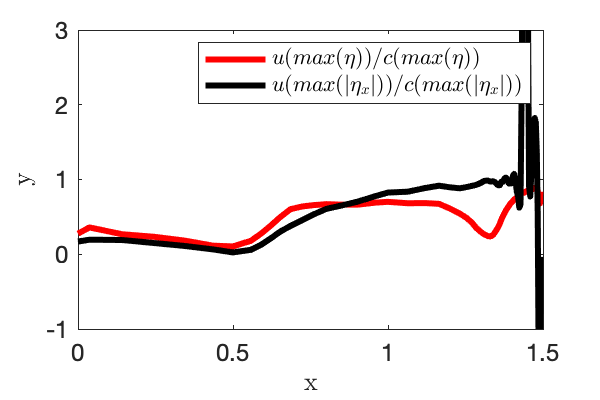

In [27]:
%% look at the ratios there
cm=gradient(smooth(unwrap(xm),5))./gradient(t);
cmx=gradient(smooth(unwrap(xsm),5))./gradient(t);
clf
p1=plot(t,smooth(um./cm,5),'r','linewidth',3);
hold on
p2=plot(t,smooth(usm./cmx,5),'k','linewidth',3);
ylim([-1 3])
xlim([0 1.5])
set(gca,'fontsize',12)
xlabel('x','interpreter','latex')
ylabel('y','interpreter','latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf,'color','w');
l1=legend([p1 p2],'$u(max(\eta))/c(max(\eta))$',...
    '$u(max(|\eta_x|))/c(max(|\eta_x|))$');
set(l1,'interpreter','latex')